# King County House Price Prediction


* Student name: Aswathi Sasikumar



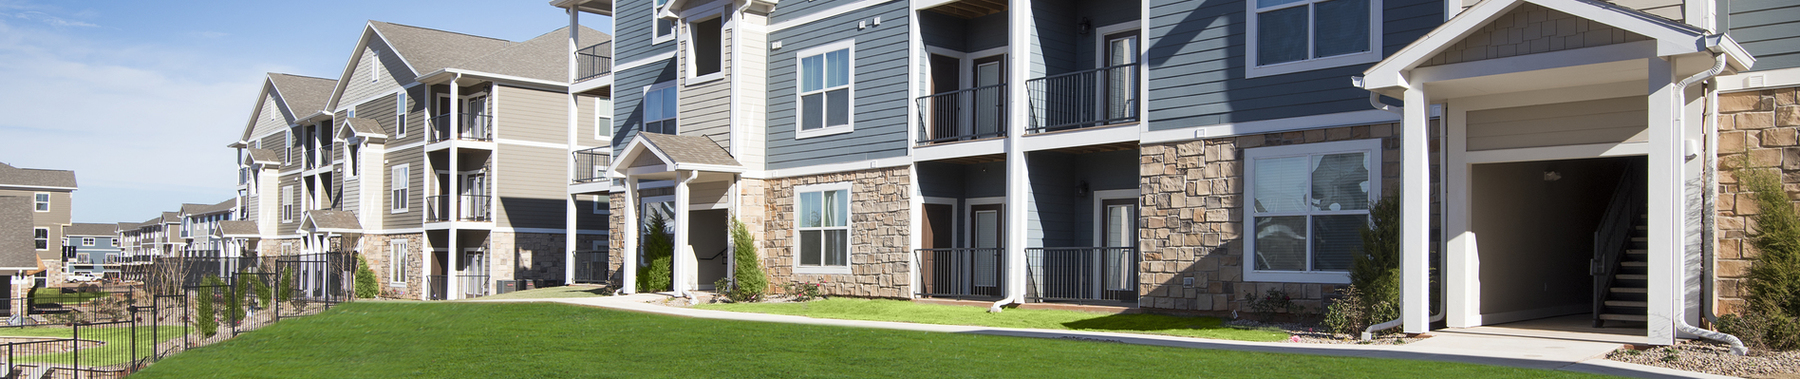

## Overview

<p>This project uses the King County House Sales dataset which has data about houses in King county like price,condition,grade,no of bedrooms,floors etc.This projects helps stakeholder,Real-estate agency to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.The regression model developed in the project predicts the price of the house and how certain parameters affect the price of the house.</p>

## Business Problem

## Data Understanding

This project uses the King County House Sales dataset.

In [61]:
#load necessary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [2]:
houseDataSet_df= pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv')

In [3]:
houseDataSet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Removing the irrelevant columns from the dataframe.
houseDataSet_df.drop(["date","view","sqft_above","sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1, inplace=True)

# Cleaning the dataset


Converting datatypes of fields 'bathrooms' and floors to integer

In [5]:
houseDataSet_df['bathrooms'] = houseDataSet_df['bathrooms'].astype("int")
houseDataSet_df['floors'] = houseDataSet_df['floors'].astype("int")


The field 'waterfront' is found to have null values

In [6]:
houseDataSet_df.waterfront.value_counts()
houseDataSet_df.waterfront.isnull().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

Filling the null values with median as there were 19221 null values it was not suitable for removing the null values as the total no of rows were only 21597

In [7]:
houseDataSet_df.waterfront.median()
houseDataSet_df = houseDataSet_df.fillna(value=houseDataSet_df.waterfront.median())
houseDataSet_df['waterfront'] = houseDataSet_df['waterfront'].astype("int")

In [8]:
houseDataSet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  int64  
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  int64  
 7   waterfront   21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.8 MB


Dropping id column as it is of significance

In [9]:
houseDataSet_df = houseDataSet_df.drop(["id"],axis=1)

In [10]:
houseDataSet_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1,1180,5650,1,0,3,7,1955
1,538000.0,3,2,2570,7242,2,0,3,7,1951
2,180000.0,2,1,770,10000,1,0,3,6,1933
3,604000.0,4,3,1960,5000,1,0,5,7,1965
4,510000.0,3,2,1680,8080,1,0,3,8,1987


### Checking for the distribution of the variables by plotting a histogram

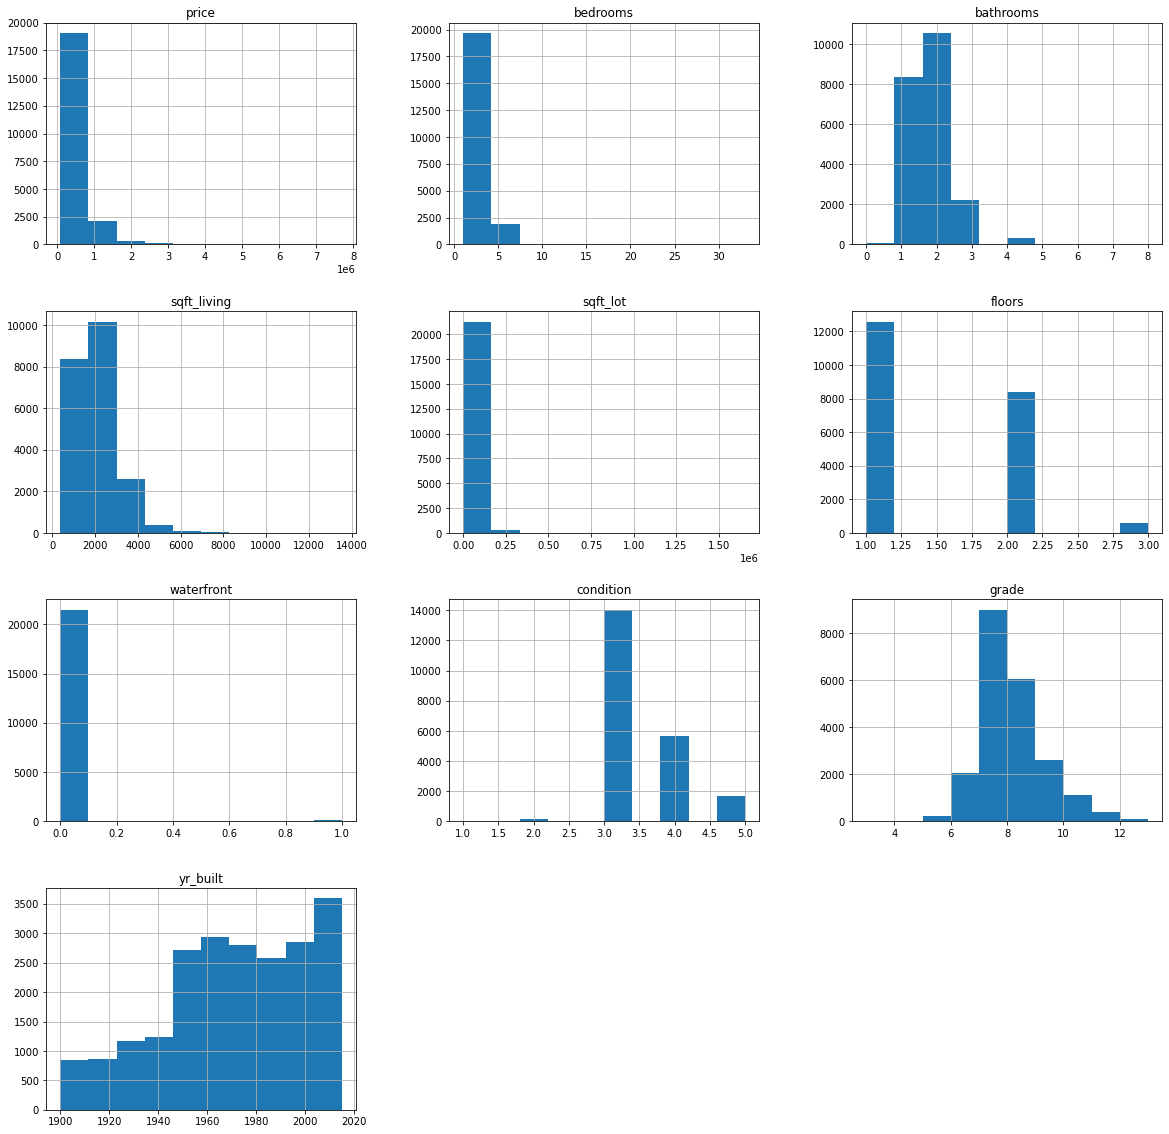

In [11]:
houseDataSet_df.hist(figsize=(20,20));

Some of the variables like condition,floors,waterfront do not follow a normal distribution, and the scales are dramatically different for some variables.

# Factors affecting price of a house

Analysing the factors affecting price of a house:
* Price v/s Number of Bedrooms
* Price v/s Sqft of building-basement and Living area
* Price v/s Waterfront
* Price v/s Yearbuilt
* Price v/s no of bathrooms
* Price v/s no of floors
* Price v/s grade

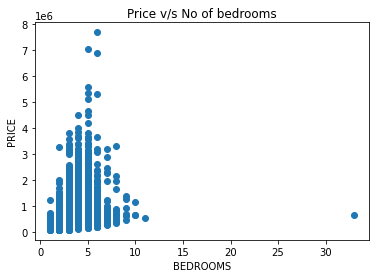

In [13]:
plt.scatter(houseDataSet_df['bedrooms'],houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('BEDROOMS')
plt.title('Price v/s No of bedrooms')
plt.show()

The relationship is not linear and there is an outlier.One house is found to have 33 bedrooms which is an outlier.


In [14]:
houseDataSet_df[houseDataSet_df.bedrooms==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,640000.0,33,1,1620,6000,1,0,5,7,1947


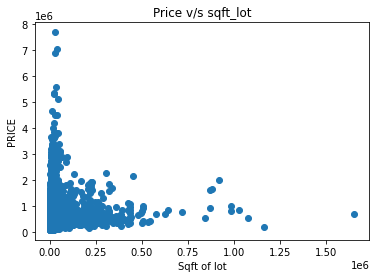

In [15]:
plt.scatter(houseDataSet_df['sqft_lot'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('Sqft of lot')
plt.title('Price v/s sqft_lot')
plt.show()

The relationship is not linear

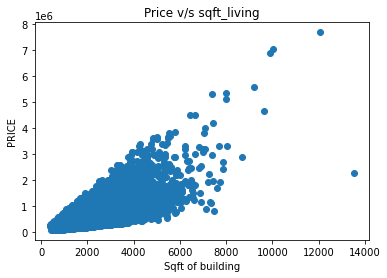

In [16]:
plt.scatter(houseDataSet_df['sqft_living'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('Sqft of building')
plt.title('Price v/s sqft_living')
plt.show()

The relationship is linear

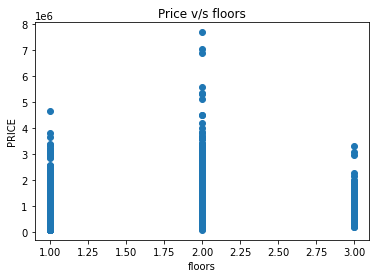

In [17]:
plt.scatter(houseDataSet_df['floors'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('floors')
plt.title('Price v/s floors')
plt.show()

The relationship is not linear

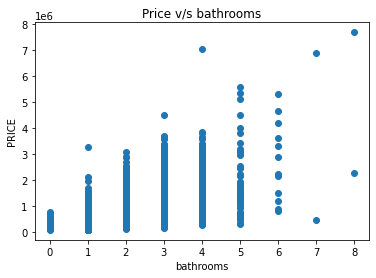

In [18]:
plt.scatter(houseDataSet_df['bathrooms'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('bathrooms')
plt.title('Price v/s bathrooms')
plt.show()

The relationship is not linear

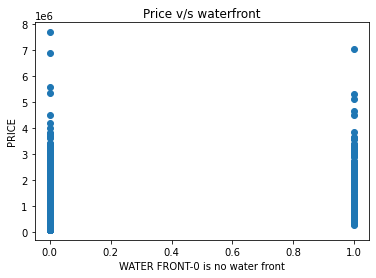

In [19]:
plt.scatter(houseDataSet_df['waterfront'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('WATER FRONT-0 is no water front')
plt.title('Price v/s waterfront')
plt.show()

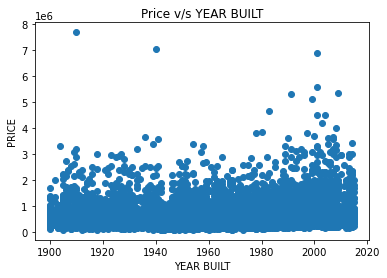

In [20]:
plt.scatter(houseDataSet_df['yr_built'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('YEAR BUILT')
plt.title('Price v/s YEAR BUILT')
plt.show()

There seems to be no relation between price and year built and can be ignored

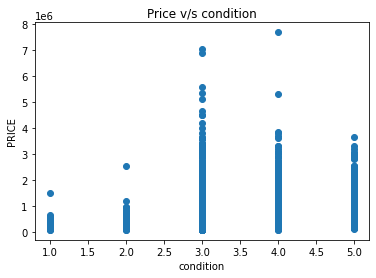

In [22]:
plt.scatter(houseDataSet_df['condition'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('condition')
plt.title('Price v/s condition')
plt.show()

/Users/kunjiv/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'House Condition and Grade')

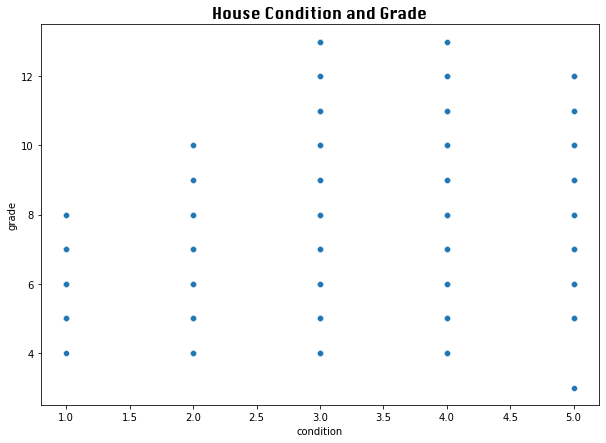

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(houseDataSet_df['condition'], houseDataSet_df['grade'])
plt.title('House Condition and Grade', fontsize=15, fontname='silom')


In [24]:
condition_dummies = pd.get_dummies(houseDataSet_df['condition'], prefix='condition', drop_first=True)
houseDataSet_df = houseDataSet_df.drop(['condition'], axis=1)
houseDataSet_df = pd.concat([houseDataSet_df,condition_dummies], axis=1)

In [73]:
houseDataSet_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,condition_2,condition_3,condition_4,condition_5
0,221900.0,3,1,1180,5650,1,0,7,1955,0,1,0,0
1,538000.0,3,2,2570,7242,2,0,7,1951,0,1,0,0
2,180000.0,2,1,770,10000,1,0,6,1933,0,1,0,0
3,604000.0,4,3,1960,5000,1,0,7,1965,0,0,0,1
4,510000.0,3,2,1680,8080,1,0,8,1987,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3,0,8,2009,0,1,0,0
21593,400000.0,4,2,2310,5813,2,0,8,2014,0,1,0,0
21594,402101.0,2,0,1020,1350,2,0,7,2009,0,1,0,0
21595,400000.0,3,2,1600,2388,2,0,8,2004,0,1,0,0


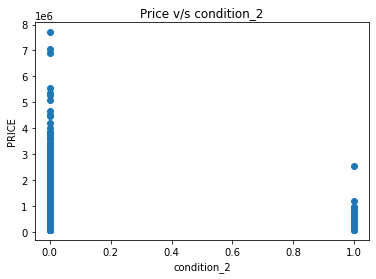

In [74]:
plt.scatter(houseDataSet_df['condition_2'] ,houseDataSet_df['price'])
plt.ylabel('PRICE')
plt.xlabel('condition_2')
plt.title('Price v/s condition_2')
plt.show()

<Figure size 432x288 with 0 Axes>

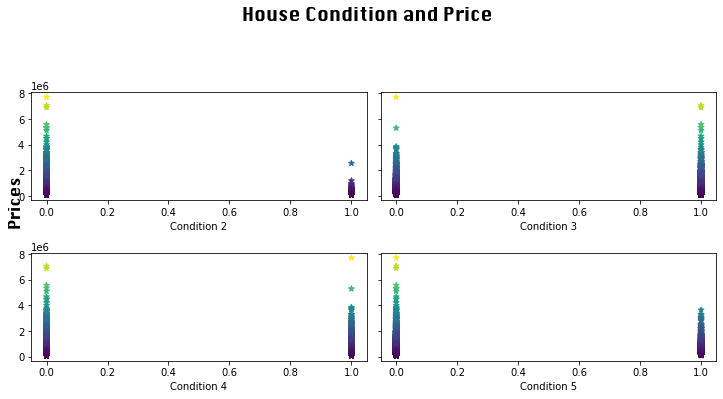

In [77]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(houseDataSet_df['condition_2'] ,houseDataSet_df['price'], c = houseDataSet_df['price'], marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(houseDataSet_df['condition_3'] ,houseDataSet_df['price'], c = houseDataSet_df['price'], marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(houseDataSet_df['condition_4'] ,houseDataSet_df['price'], c = houseDataSet_df['price'], marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(houseDataSet_df['condition_5'] ,houseDataSet_df['price'], c = houseDataSet_df['price'], marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show();

From the above scatterplots it is clear that only sqt_living follows linear relationship with price

## Checking Correlations and Multicollinearity


We need to find  out the variables that are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables (i.e., they can't be predicted by other explanatory variables with high accuracy). Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

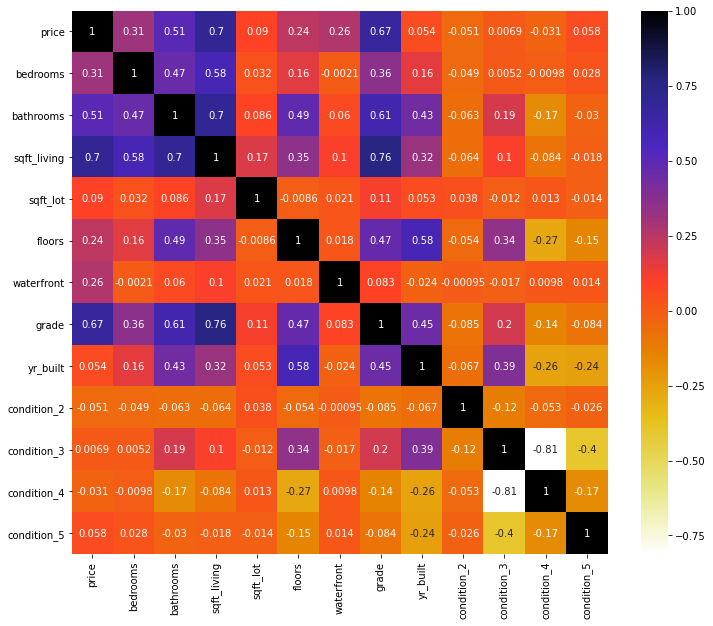

In [78]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
#cor = X_train.corr()
cor = houseDataSet_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [79]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()# Set of all the names of correlated columns
    vals =set()
    corr_matrix = houseDataSet_df.corr()
    for i in range(0,len(corr_matrix.columns)):
        for j in range(0,i):
            if corr_matrix.iloc[i, j] > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(houseDataSet_df, 0.7)

Thus 'grade' and 'sqft_living' have multicollinearity

In [82]:
corr_features

{'grade', 'sqft_living'}

In [83]:
features = []
correlations = []
corr_matrix = houseDataSet_df.corr()
for idx, correlation in corr_matrix['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [84]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
2,0.701917,sqft_living
3,0.667951,grade
1,0.510631,bathrooms
0,0.308787,bedrooms


## MULTIPLE REGRESSION

I am going to create a model using features that has highest impact on price and also which has a highest correlation with price as seen above.

## Model 1

In [85]:
outcome = 'price'
x_cols = [ 'sqft_living','grade','bathrooms','bedrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model1 = ols(formula=formula, data=houseDataSet_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6398.
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:47:03   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.697e+05    1.5e+04    -31.362      0.000   -4.99e+05    -4.4e+05
sqft_living   213.8996      3.534     60.520      0.000     206.972     220.827
grade        9.174e+04   2296.320     39.950      0.000    8.72e+04    9.62e+04
bathrooms    5197.7535   3292.786      1.579      0.114   -1256.351    1.17e+04
bedrooms    -4.347e+04   2288.213    -18.997      0.000    -4.8e+04    -3.9e+04
==============================================================================
Omnibus:                    16440.702   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           880265.683
Skew:                           3.178   Prob(JB):                         0.00
Kurtosis:                      33.624   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


R-squared: The r-squared value, 0.542, indicates that the model can account for about 54% of the variability of price around its mean.

p-value: All of the p-values round to 0, which means we can reject the null hypothesis.

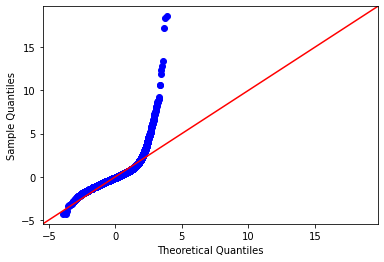

In [86]:
import scipy.stats as stats 
residuals = model1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

Normality of residuals: Not normal.
Thus normality assumptions for linear regression is violated



## Model 2

Grade has multi-collinearity with sqft_living.So removing grade from model I have created second model.

In [87]:
outcome = 'price'
x_cols = ['sqft_living','bedrooms','bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=houseDataSet_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7448.
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:47:12   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.846e+04   6782.225     10.094      0.000    5.52e+04    8.18e+04
sqft_living   299.6549      2.910    102.984      0.000     293.952     305.358
bedrooms    -5.998e+04   2332.251    -25.716      0.000   -6.45e+04   -5.54e+04
bathrooms      2.9e+04   3355.929      8.641      0.000    2.24e+04    3.56e+04
==============================================================================
Omnibus:                    14396.910   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488857.501
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      25.660   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

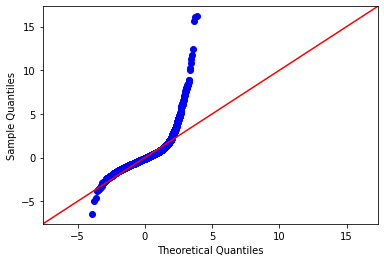

In [88]:
import scipy.stats as stats 
residuals = model2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

Normality of residuals: Not normal.

Thus normality assumptions for linear regression is violated.Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

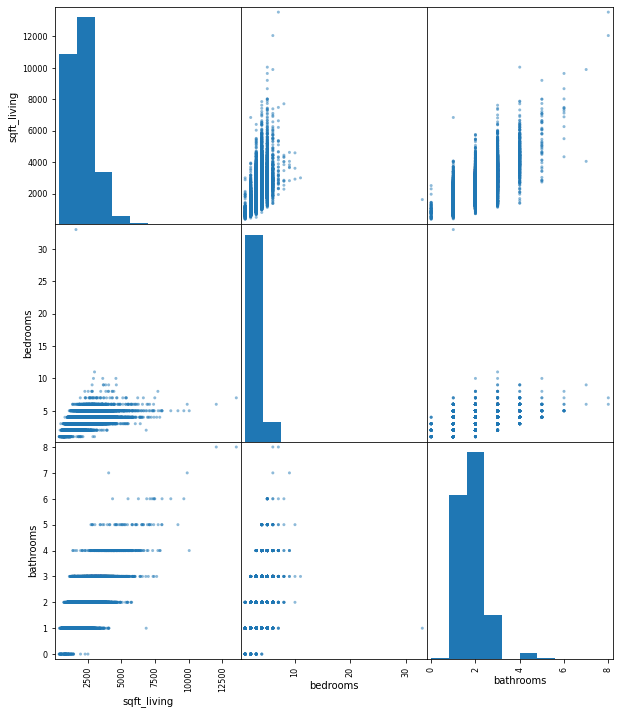

In [89]:
pd.plotting.scatter_matrix(houseDataSet_df[x_cols], figsize=(10,12));

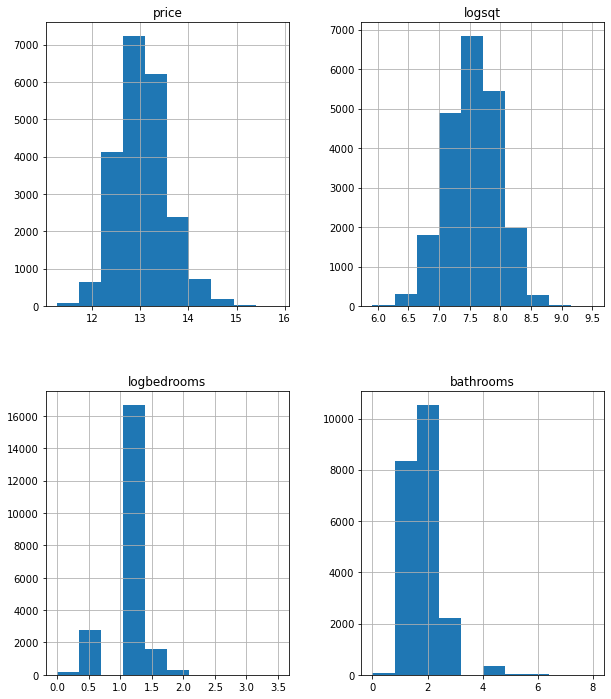

In [91]:
#Performing log transformation on price,sqft_living and  bedrooms
data_log = pd.DataFrame([])
data_log['price'] = np.log(houseDataSet_df['price'])
data_log['logsqt'] = np.log(houseDataSet_df['sqft_living'])
data_log['logbedrooms'] = np.log(houseDataSet_df['bedrooms'])
data_log['bathrooms'] =houseDataSet_df['bathrooms']
data_log.hist(figsize  = [10,12]);

In [92]:
X = data_log.drop('price', axis=1)
y = data_log['price']

In [93]:
data_log

,price,logsqt,logbedrooms,bathrooms
0,12.309982,7.073270,1.098612,1
1,13.195614,7.851661,1.098612,2
2,12.100712,6.646391,0.693147,1
3,13.311329,7.580700,1.386294,3
4,13.142166,7.426549,1.098612,2
...,...,...,...,...
21592,12.793859,7.333023,1.098612,2
21593,12.899220,7.745003,1.386294,2
21594,12.904459,6.927558,0.693147,0
21595,12.899220,7.377759,1.098612,2


In [94]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model3 = sm.OLS(y,X_int).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     6568.
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:48:30   Log-Likelihood:                -9789.8
No. Observations:               21597   AIC:                         1.959e+04
Df Residuals:                   21593   BIC:                         1.962e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6247      0.062    106.813      0.000       6.503       6.746
logsqt          0.8813      0.010     91.231      0.000       0.862       0.900
logbedrooms    -0.3121      0.012    -25.943      0.000      -0.336      -0.288
bathrooms       0.0780      0.005     16.237      0.000       0.069       0.087
==============================================================================
Omnibus:                      104.310   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.727
Skew:                           0.131   Prob(JB):                     9.91e-22
Kurtosis:                       2.802   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

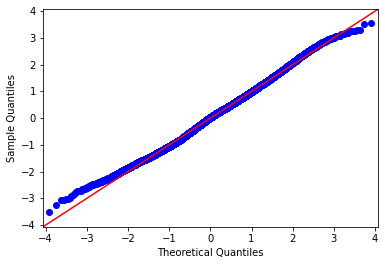

In [95]:
import scipy.stats as stats 
residuals = model3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

Since almost all of the datapoints fall along a straight line in this QQ-plot, we can consider the normality assumption satisfied.




R-squared: The r-squared value, 0.477, indicates that the model can account for about 47% of the variability of price around its mean.

p-value: All of the p-values round to 0, which means we can reject the null hypothesis.

## Validating the Model


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [131]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16197, 3) (16197,) (5400, 3) (5400,)


In [132]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [133]:
linreg.fit(X_train, y_train)

LinearRegression()

In [134]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [135]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [136]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [137]:
from sklearn.metrics import mean_squared_error

In [138]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.14408104448120684
Test Mean Squarred Error: 0.1476849497690017


The Mean Squarred Error for the train and test subsets are similar. This suggests that the model will perform similarly on different data.

sqft_living,bedrooms and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features included.



## Conclusion

Square footage, no of bedrooms and bathrooms are the best predictors of a house's price in King County. Homeowners who are interested in selling their homes at a higher price should focus on expanding square footage and improving the quality of construction.